In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1082,ham,Send to someone else :-),NaN,NaN,NaN
3322,ham,"She said,'' do u mind if I go into the bedroom...",NaN,NaN,NaN
4533,ham,I have no money 4 steve mate! !,NaN,NaN,NaN
936,ham,"Since when, which side, any fever, any vomitin.",NaN,NaN,NaN
2696,ham,Nope but i'm going home now then go pump petro...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop unnamed colums
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
4154,spam,Want a new Video Phone? 750 anytime any networ...
4488,ham,The new deus ex game comin early next yr
3517,ham,Are you willing to go for apps class.
981,ham,Reckon need to be in town by eightish to walk ...
3377,ham,Hows that watch resizing


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2540,ham,"They said if its gonna snow, it will start aro..."
2359,spam,Spook up your mob with a Halloween collection ...
4993,ham,My drive can only be read. I need to write
3724,ham,Nothing spl..wat abt u and whr ru?
5422,ham,Ok k..sry i knw 2 siva..tats y i askd..


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# check duplicate
df.duplicated().sum()

403

In [13]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [14]:
# check duplicate
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

# 2.Exploratory Data Analysis 

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

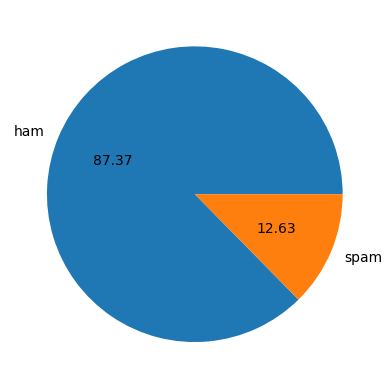

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to C:\Users\MANISHA
[nltk_data]     GHOSH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\MANISHA
[nltk_data]     GHOSH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\MANISHA
[nltk_data]     GHOSH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\MANISHA
[nltk_data]     GHOSH\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
# num of sentence
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#not spam
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# spam
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

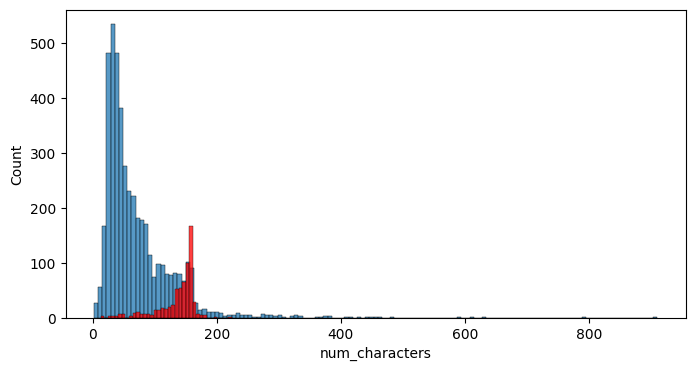

In [30]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

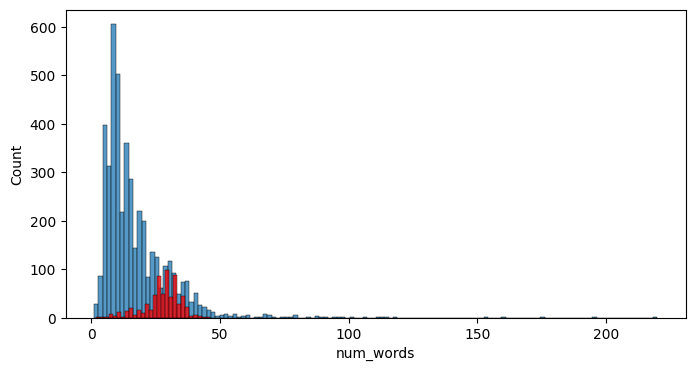

In [31]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentence', ylabel='Count'>

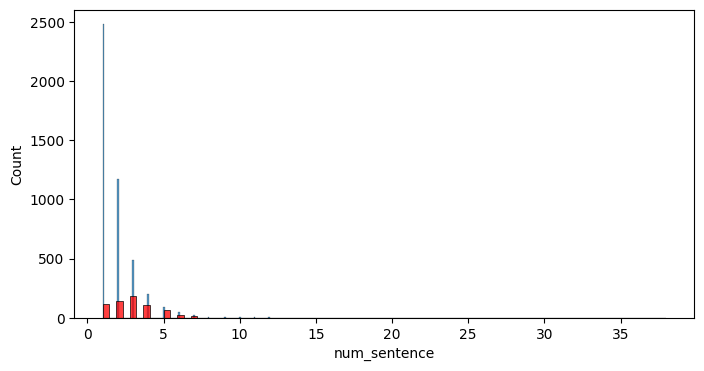

In [32]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['target'] == 0]['num_sentence'])
sns.histplot(df[df['target'] == 1]['num_sentence'],color='red')

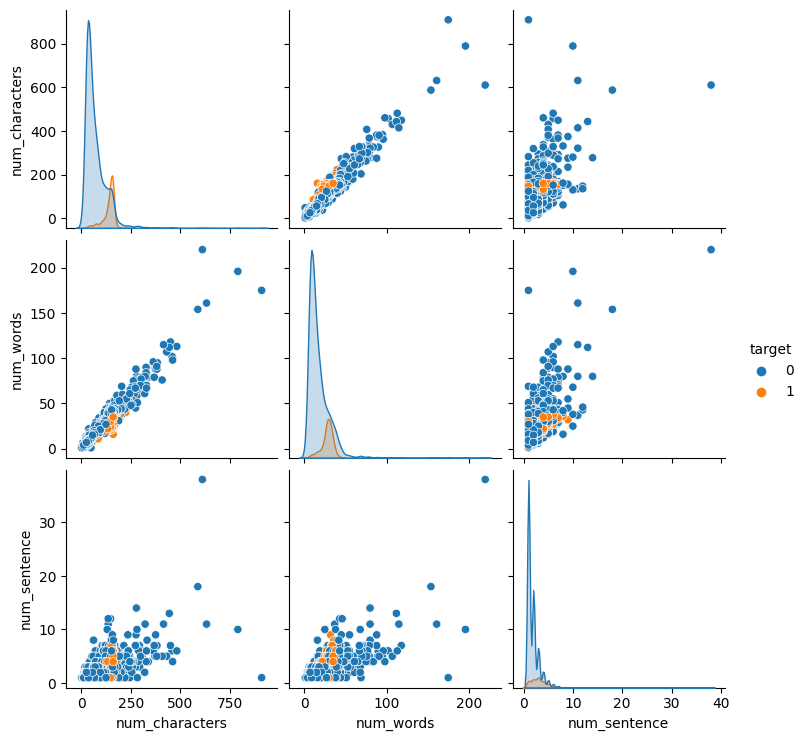

In [33]:
sns.pairplot(df, hue="target")

## 3.Data Preprocessing

In [34]:
import re
import string
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize

In [35]:
def modified_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()

    for i in text:
        y.append(lemmatizer.lemmatize(i))
    
            
    return " ".join(y)

In [36]:
modified_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymore tonight k cried enough today'

In [37]:
#create a new column
df['transformed_text']=df['text'].apply(modified_text)

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [39]:
from wordcloud import WordCloud
wc = WordCloud(width=453,height=458,min_font_size=8.6,background_color='white')

In [40]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

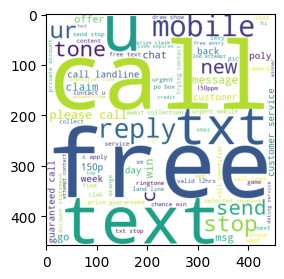

In [41]:
plt.figure(figsize=(6,3))
plt.imshow(spam_wc)

In [42]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

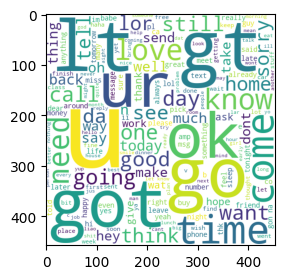

In [43]:
plt.figure(figsize=(6,3))
plt.imshow(ham_wc)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [45]:
spam_corpus=[]
for sms in df[df['target']==1]['transformed_text'].tolist():
    for word in sms.split():
        spam_corpus.append(word)

In [46]:
len(spam_corpus)

9939

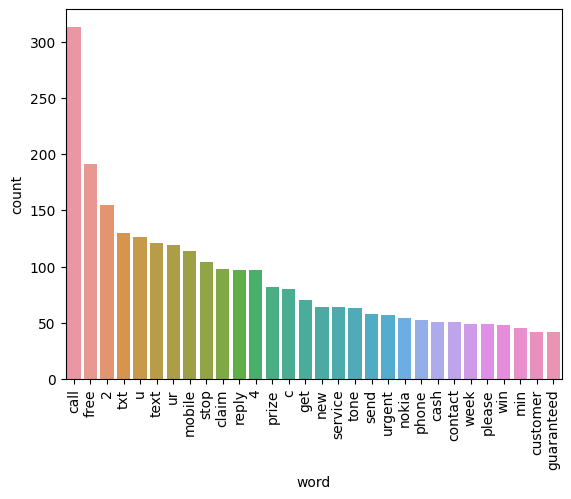

In [47]:
from collections import Counter
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=spam_df)

plt.xticks(rotation='vertical')
plt.show()

In [48]:
ham_corpus=[]
for sms in df[df['target']==0]['transformed_text'].tolist():
    for word in sms.split():
        ham_corpus.append(word)


In [49]:
len(spam_corpus)

9939

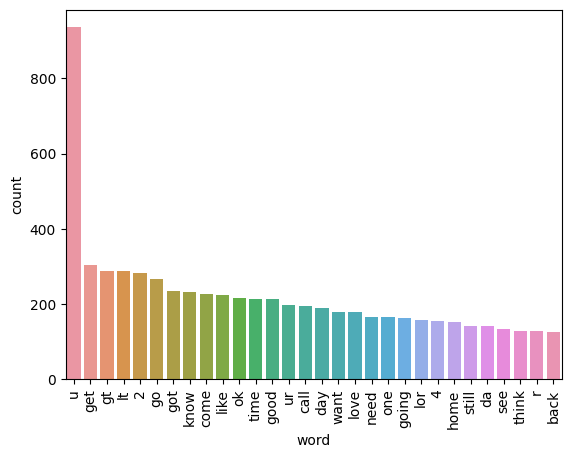

In [50]:
from collections import Counter
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=ham_df)

plt.xticks(rotation='vertical')
plt.show()

## 4.Model Building

In [51]:
# Text Vectorization: Bag of words,TFIDF
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

## A.BAG OF WORDS

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [53]:
X1 = cv.fit_transform(df['transformed_text']).toarray()

In [54]:
X1.shape

(5169, 7490)

In [55]:
y1=df['target'].values

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=2)

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

## i.Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
bnb=BernoulliNB()
mnb = MultinomialNB()

In [60]:
gnb.fit(X1_train,y1_train)  #gaussian naive bayes
y_pred1 = gnb.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.8945841392649904
0.5700483091787439
[[807  89]
 [ 20 118]]


In [61]:
mnb.fit(X1_train,y1_train) #multinomial naive bayes
y_pred1 = gnb.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.8945841392649904
0.5700483091787439
[[807  89]
 [ 20 118]]


In [62]:
bnb.fit(X1_train,y1_train) #bernoulli naive bayes
y_pred1 = gnb.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.8945841392649904
0.5700483091787439
[[807  89]
 [ 20 118]]


## ii.SVC

In [63]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)

In [64]:
svc.fit(X1_train,y1_train)
y_pred1=svc.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.9235976789168279
0.7122302158273381
[[856  40]
 [ 39  99]]


## iii.Decision tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)

In [66]:
dtc.fit(X1_train,y1_train)
y_pred1=dtc.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.925531914893617
0.9066666666666666
[[889   7]
 [ 70  68]]


## iv.Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=2, n_jobs=-1)

In [68]:
rfc.fit(X1_train,y1_train)
y_pred1=rfc.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.9632495164410058
1.0
[[896   0]
 [ 38 100]]


## v.Extra Tree

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=10, random_state=2, n_jobs=-1)

In [70]:
etc.fit(X1_train,y1_train)
y_pred1=etc.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.9661508704061895
0.9813084112149533
[[894   2]
 [ 33 105]]


## vi.Bagging Classifier

In [71]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=10, random_state=2, n_jobs=-1)

In [72]:
bc.fit(X1_train,y1_train)
y_pred1=bc.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.9555125725338491
0.8770491803278688
[[881  15]
 [ 31 107]]


## vii.Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=10, random_state=2)

In [74]:
gbdt.fit(X1_train,y1_train)
y_pred1=gbdt.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.9081237911025145
0.9215686274509803
[[892   4]
 [ 91  47]]


## viii.XG Boost

In [75]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=10, random_state=2, n_jobs=-1)

In [76]:
xgb.fit(X1_train,y1_train)
y_pred1=xgb.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.9545454545454546
0.9504950495049505
[[891   5]
 [ 42  96]]


## ix.AdaBoost

In [77]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=10, random_state=2)

In [78]:
abc.fit(X1_train,y1_train)
y_pred1=abc.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.937137330754352
0.8924731182795699
[[886  10]
 [ 55  83]]


## x.Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [80]:
lrc.fit(X1_train,y1_train)
y_pred1=lrc.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


## x.K Nearest Neighbour

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [82]:
knc.fit(X1_train,y1_train)
y_pred1=knc.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))

0.902321083172147
1.0
[[896   0]
 [101  37]]


In [83]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [84]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred, average='weighted')
    return accuracy,precision

In [85]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,X1_train,y1_train,X1_test,y1_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [86]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [87]:
performance_df

,Algorithm,Accuracy,Precision
4,LR,0.970019,0.970113
8,ETC,0.966151,0.966658
2,NB,0.963250,0.965381
5,RF,0.963250,0.964745
10,xgb,0.954545,0.954385
7,BgC,0.955513,0.954136
6,AdaBoost,0.937137,0.935001
3,DT,0.926499,0.926777
0,SVC,0.923598,0.923834
1,KN,0.902321,0.912216


In [88]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [89]:
performance_df1 

,Algorithm,variable,value
0,LR,Accuracy,0.970019
1,ETC,Accuracy,0.966151
2,NB,Accuracy,0.963250
3,RF,Accuracy,0.963250
4,xgb,Accuracy,0.954545
5,BgC,Accuracy,0.955513
6,AdaBoost,Accuracy,0.937137
7,DT,Accuracy,0.926499
8,SVC,Accuracy,0.923598
9,KN,Accuracy,0.902321


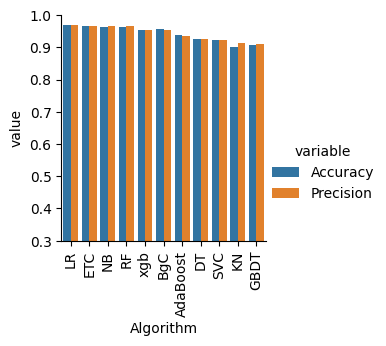

In [90]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=3)
plt.ylim(0.3,1.0)
plt.xticks(rotation='vertical')
plt.show() 

## B.TFIDF

In [91]:
X2 = tfidf.fit_transform(df['transformed_text']).toarray()
X2.shape

(5169, 3000)

In [92]:
y2=df['target'].values

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=2)

In [95]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [96]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
bnb=BernoulliNB()
mnb = MultinomialNB()

In [97]:
gnb.fit(X2_train,y2_train)  #gaussian naive bayes
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8810444874274661
0.5348837209302325
[[796 100]
 [ 23 115]]


In [98]:
bnb.fit(X2_train,y2_train)  #bernoulli naive bayes
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8810444874274661
0.5348837209302325
[[796 100]
 [ 23 115]]


In [99]:
mnb.fit(X2_train,y2_train)  #multinomial naive bayes
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8810444874274661
0.5348837209302325
[[796 100]
 [ 23 115]]


In [100]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)

In [101]:
svc.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8810444874274661
0.5348837209302325
[[796 100]
 [ 23 115]]


In [102]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)

In [103]:
dtc.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8810444874274661
0.5348837209302325
[[796 100]
 [ 23 115]]


In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [105]:
rfc.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8810444874274661
0.5348837209302325
[[796 100]
 [ 23 115]]


In [106]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [107]:
etc.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8810444874274661
0.5348837209302325
[[796 100]
 [ 23 115]]


In [108]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=50, random_state=2)

In [109]:
bc.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8810444874274661
0.5348837209302325
[[796 100]
 [ 23 115]]


In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [111]:
gbdt.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8810444874274661
0.5348837209302325
[[796 100]
 [ 23 115]]


In [112]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [113]:
xgb.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8810444874274661
0.5348837209302325
[[796 100]
 [ 23 115]]


In [114]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

In [115]:
abc.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8810444874274661
0.5348837209302325
[[796 100]
 [ 23 115]]


In [116]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [117]:
lrc.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8810444874274661
0.5348837209302325
[[796 100]
 [ 23 115]]


In [118]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [119]:
knc.fit(X2_train,y2_train)  
y_pred2 = gnb.predict(X2_test)
print(accuracy_score(y2_test,y_pred2))
print(precision_score(y2_test,y_pred2))
print(confusion_matrix(y2_test,y_pred2))

0.8810444874274661
0.5348837209302325
[[796 100]
 [ 23 115]]


In [120]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,X2_train,y2_train,X2_test,y2_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [121]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [122]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.977756,0.977709
2,NB,0.974855,0.975564
5,RF,0.967118,0.967927
8,ETC,0.968085,0.967526
7,BgC,0.956480,0.955384
4,LR,0.952611,0.952481
10,xgb,0.950677,0.949384
3,DT,0.938104,0.935094
6,AdaBoost,0.937137,0.935001
9,GBDT,0.925532,0.923094


In [124]:
performance_df2 = pd.melt(performance_df, id_vars = "Algorithm")

In [125]:
performance_df2 

,Algorithm,variable,value
0,SVC,Accuracy,0.977756
1,NB,Accuracy,0.974855
2,RF,Accuracy,0.967118
3,ETC,Accuracy,0.968085
4,BgC,Accuracy,0.956480
5,LR,Accuracy,0.952611
6,xgb,Accuracy,0.950677
7,DT,Accuracy,0.938104
8,AdaBoost,Accuracy,0.937137
9,GBDT,Accuracy,0.925532


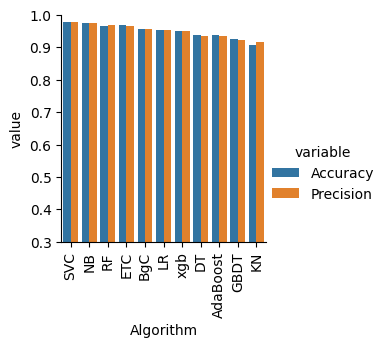

In [126]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df2, kind='bar',height=3)
plt.ylim(0.3,1.0)
plt.xticks(rotation='vertical')
plt.show() 